# Non-Periodic Signals

We have so far looked at periodic signal, r signals that repeat forever. It also means that he frequency components they contain donot change over time.  In this chapter, we consider non-periodic signals, whosefrequency componentsdochange over time. Sirens are a good example of non-periodic signals

# Linear Chirp
Chirp are signals that makes a sinusoid that sweeps linearly through a range of frequencies.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Audio

In [37]:
sr = 1000
f = np.linspace(2,10,sr)
t = np.linspace(0,1,sr)
#x = np.sin(2*np.pi*f*t)
#plt.plot(t,x);
# RED ALERT: The Above is not correct. 

But, at what rate is the frequency changing? or how do we define the change in frequency with respect to time?<br>

**Recall**<br>
Frequency is cycles per second. Cycles can be converted to phases by multiplying frequency by $2\pi$.

**But, what is phase?**<br>
It is the number of cycles since start time expressed in radians. Each cycle is $2\pi$ radians

**Now, we want to know how much does the phase change with respect to time due to change in frequency**

In [26]:
dt = np.diff(t, prepend=0)

`np.diff` computes the difference between adjacent elements of $t$, returning the length of each interval in seconds.  If the elements of $t$ are equally spaced,the $dt$ are all the same.

When frequency is constant, the phase,$\phi$, increases linearly over time: $$\phi = 2\pi ft$$

When frequency is a function of time, the change in phase during a short time interval, $\Delta t$ is: $$\Delta \Phi = 2\pi f(t) \Delta t$$


In [27]:
dphi = 2*np.pi*f*dt

Now, since `dphi` contains the changes in phase, we can get the total phase at each timestep by adding up the changes: In other words, Phase is an integral of frequency, or frquency is derivative of phase: $$\frac{d\phi}{dt} = 2\pi f(t)$$, $$=\Phi = \int 2\pi f(t)dt$$


In [28]:
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)

In [29]:
x = np.sin(phases)

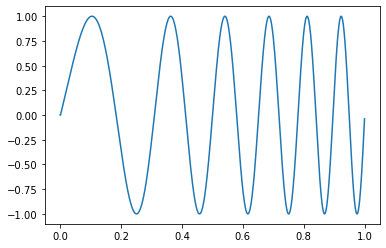

In [36]:
plt.plot(t,x[:-1])

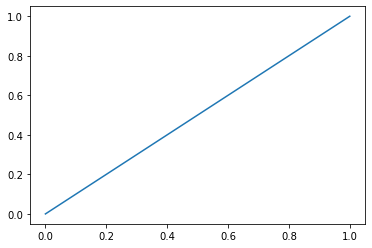

In [39]:
# plotting the change in frequency over time
plt.plot(t,t)

Lets us combine all the code above and generate the chirp sound

In [41]:
sr = 44100
f = np.linspace(220,880,sr)
t = np.linspace(0,5,sr)
dt = np.diff(t, prepend=0)
dphi = 2*np.pi*f*dt
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)
x = np.sin(phases)
audio = Audio(data=x, rate=sr)
audio

# Exponential Chirp

In the previous section, our choice of frequency span is two octaves from A3 to A5 i.e. from 220 Hz to 880 Hz.